<font color="green">**Temporal data analysis using semantic scores data**</font>

**Import libraries**

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**Read stock data, sematic scores data and preprocess**

In [ ]:
#Get the stock quote 
df = web.DataReader('AMD', data_source='yahoo', start='2016-07-22', end='2020-05-26') 

#To get stock data for Apple, Disney, Tesla=>uncomment required line below
#df = web.DataReader('AAPL', data_source='yahoo', start='2016-07-22', end='2020-05-26')
#df = web.DataReader('DIS', data_source='yahoo', start='2016-07-22', end='2020-05-26')
#df = web.DataReader('TSLA', data_source='yahoo', start='2016-07-22', end='2020-05-26')

#Show the data 
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-07-22,5.97,5.45,5.73,5.84,101838300,5.84
2016-07-25,6.95,5.92,5.93,6.70,118328600,6.70
2016-07-26,7.16,6.71,6.76,6.98,81230600,6.98
2016-07-27,6.98,6.68,6.93,6.85,38567300,6.85
2016-07-28,6.98,6.74,6.79,6.82,27515600,6.82


In [ ]:
#Read semantic scores from file
newsScores=pd.read_csv('amd-all-scores.csv')
newsScores.head(3)

,date,subjectivity,polarity,entropy,flesch_index,dale_chall_index,final_semantic_score
0,2016-07-22,0.417751,0.133707,7.207807,50.3,13.015,0.291504
1,2016-07-23,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-24,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Impute missing values
newsScores=newsScores.ffill(axis=0)
newsScores.head(3)

,date,subjectivity,polarity,entropy,flesch_index,dale_chall_index,final_semantic_score
0,2016-07-22,0.417751,0.133707,7.207807,50.3,13.015,0.291504
1,2016-07-23,0.417751,0.133707,7.207807,50.3,13.015,0.291504
2,2016-07-24,0.417751,0.133707,7.207807,50.3,13.015,0.291504


In [ ]:
df1=df.reset_index()
df1.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-07-22,5.97,5.45,5.73,5.84,101838300,5.84
1,2016-07-25,6.95,5.92,5.93,6.70,118328600,6.70
2,2016-07-26,7.16,6.71,6.76,6.98,81230600,6.98


**Normalize stock data**

In [ ]:
#Normalize 'high' column
df1['normalized_high']=0
length=len(df1)
minIndex=df1['High'].min()
maxIndex=df1['High'].max()
for i in range(length):
  index=df1.loc[i,"High"]
  normalizedIndex=(index-minIndex)/(maxIndex-minIndex)
  df1.loc[i,"normalized_high"]=normalizedIndex

In [ ]:
#Normalize 'low' column
df1['normalized_low']=0
length=len(df1)
minIndex=df1['Low'].min()
maxIndex=df1['Low'].max()
for i in range(length):
  index=df1.loc[i,"Low"]
  normalizedIndex=(index-minIndex)/(maxIndex-minIndex)
  df1.loc[i,"normalized_low"]=normalizedIndex

In [ ]:
#Normalize 'open' column
df1['normalized_open']=0
length=len(df1)
minIndex=df1['Open'].min()
maxIndex=df1['Open'].max()
for i in range(length):
  index=df1.loc[i,"Open"]
  normalizedIndex=(index-minIndex)/(maxIndex-minIndex)
  df1.loc[i,"normalized_open"]=normalizedIndex

In [ ]:
#Normalize 'close' column
df1['normalized_close']=0
length=len(df1)
minIndex=df1['Close'].min()
maxIndex=df1['Close'].max()
for i in range(length):
  index=df1.loc[i,"Close"]
  normalizedIndex=(index-minIndex)/(maxIndex-minIndex)
  df1.loc[i,"normalized_close"]=normalizedIndex

In [ ]:
#Normalize 'volume' column
df1['normalized_volume']=0
length=len(df1)
minIndex=df1['Volume'].min()
maxIndex=df1['Volume'].max()
for i in range(length):
  index=df1.loc[i,"Volume"]
  normalizedIndex=(index-minIndex)/(maxIndex-minIndex)
  df1.loc[i,"normalized_volume"]=normalizedIndex

In [ ]:
#Normalize 'adjclose' column
df1['normalized_adjclose']=0
length=len(df1)
minIndex=df1['Adj Close'].min()
maxIndex=df1['Adj Close'].max()
for i in range(length):
  index=df1.loc[i,"Adj Close"]
  normalizedIndex=(index-minIndex)/(maxIndex-minIndex)
  df1.loc[i,"normalized_adjclose"]=normalizedIndex

**Merge normalized stock data and semantic scores**

In [ ]:
#Merge two datasets
newsScores['date'] = pd.to_datetime(newsScores['date'])
merged_data = pd.merge(left=df1, right=newsScores, left_on='Date', right_on='date') #merge datasets
merged_data.drop(['date'], axis=1,inplace=True) #remove redundant column
merged_data.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,normalized_high,normalized_low,normalized_open,normalized_close,normalized_volume,normalized_adjclose,subjectivity,polarity,entropy,flesch_index,dale_chall_index,final_semantic_score
0,2016-07-22,5.97,5.45,5.73,5.84,101838300,5.84,0.000375,0.000000,0.000000,0.001881,0.289159,0.001881,0.417751,0.133707,7.207807,50.3,13.015,0.291504
1,2016-07-25,6.95,5.92,5.93,6.70,118328600,6.70,0.018755,0.009028,0.003794,0.018059,0.341672,0.018059,0.417751,0.133707,7.207807,50.3,13.015,0.291504
2,2016-07-26,7.16,6.71,6.76,6.98,81230600,6.98,0.022693,0.024203,0.019541,0.023326,0.223534,0.023326,0.417751,0.133707,7.207807,50.3,13.015,0.291504


**Compute and plot correlation**

In [ ]:
#Compute correlation matrix
correlation_df = merged_data.corr()
correlation_df.head(7)

,High,Low,Open,Close,Volume,Adj Close,normalized_high,normalized_low,normalized_open,normalized_close,normalized_volume,normalized_adjclose,subjectivity,polarity,entropy,flesch_index,dale_chall_index,final_semantic_score
High,1.000000,0.999001,0.999266,0.999222,0.151221,0.999222,1.000000,0.999001,0.999266,0.999222,0.151221,0.999222,0.127277,0.112787,0.135914,-0.059562,-0.048049,0.201833
Low,0.999001,1.000000,0.999189,0.999275,0.124328,0.999275,0.999001,1.000000,0.999189,0.999275,0.124328,0.999275,0.126747,0.111063,0.130942,-0.058395,-0.047165,0.197128
Open,0.999266,0.999189,1.000000,0.998362,0.137995,0.998362,0.999266,0.999189,1.000000,0.998362,0.137995,0.998362,0.126500,0.112236,0.134143,-0.059089,-0.047714,0.199989
Close,0.999222,0.999275,0.998362,1.000000,0.137584,1.000000,0.999222,0.999275,0.998362,1.000000,0.137584,1.000000,0.126962,0.111920,0.133572,-0.059089,-0.047650,0.199607
Volume,0.151221,0.124328,0.137995,0.137584,1.000000,0.137584,0.151221,0.124328,0.137995,0.137584,1.000000,0.137584,0.052380,0.137041,0.178280,0.020266,0.031318,0.168274
Adj Close,0.999222,0.999275,0.998362,1.000000,0.137584,1.000000,0.999222,0.999275,0.998362,1.000000,0.137584,1.000000,0.126962,0.111920,0.133572,-0.059089,-0.047650,0.199607
normalized_high,1.000000,0.999001,0.999266,0.999222,0.151221,0.999222,1.000000,0.999001,0.999266,0.999222,0.151221,0.999222,0.127277,0.112787,0.135914,-0.059562,-0.048049,0.201833


**Visualize different semantic scores against stock data**

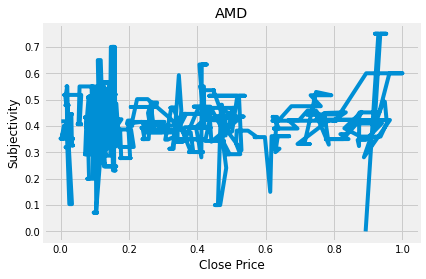

In [ ]:
#Plot line graph
plt.plot(merged_data['normalized_close'], merged_data['subjectivity']) 
plt.xlabel('Close Price')  
plt.ylabel('Subjectivity')  
plt.title('AMD') 
plt.show()

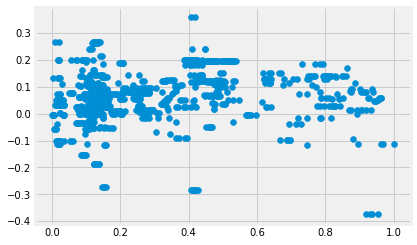

In [ ]:
#Plot scatter graph
plt.scatter(merged_data['normalized_close'], merged_data['polarity'])
plt.show()

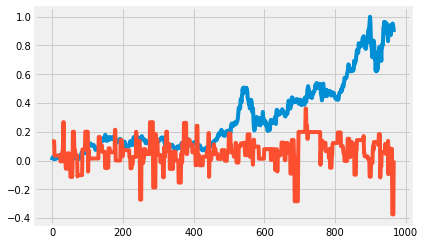

In [ ]:
#Plot graph between normalized close and polarity
plt.plot(merged_data['normalized_close'])
plt.plot(merged_data['polarity'])
plt.show()

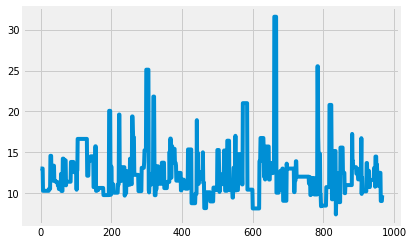

In [ ]:
#Plot graph of dale chall index over time
plt.plot(merged_data['dale_chall_index'])
plt.show()

In [ ]:
correlation_data=merged_data[['normalized_close','polarity','subjectivity','entropy','flesch_index','dale_chall_index','final_semantic_score']]

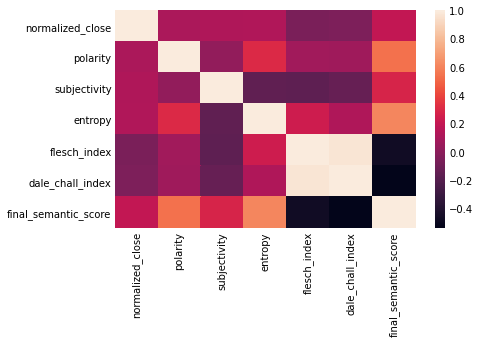

In [ ]:
#Plot heatmap
import seaborn as sns
corr = correlation_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

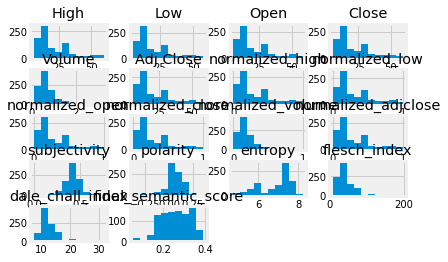

In [ ]:
#Plot histogram
merged_data.hist()
plt.show()

**Plot area under curve**

In [ ]:
#Convert closing price into movement direction format
merged_data['binary_up_down']=0
for i in range (len(merged_data)-1):
  curr=merged_data.loc[i,'Close']
  next=merged_data.loc[i+1,'Close']
  if(next>curr):
    merged_data.loc[i+1,'binary_up_down']=1
  else:
    merged_data.loc[i+1,'binary_up_down']=0

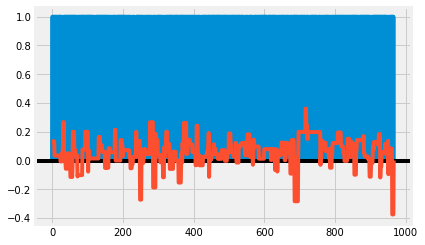

In [ ]:
#Plot graph of area under curve
plt.plot(merged_data['binary_up_down'])
plt.axhline(y=0, color='black', linestyle='-')
plt.plot(merged_data['polarity'])
plt.show()

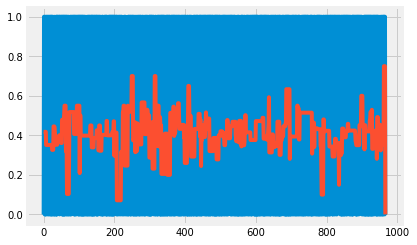

In [ ]:
#Plot graph of area under curve
plt.plot(merged_data['binary_up_down'])
plt.plot(merged_data['subjectivity'])
plt.show()

In [ ]:
#Convert close price into movement direction format
merged_data['binary_up_down_1']=0
for i in range (len(merged_data)-1):
  curr=merged_data.loc[i,'Close']
  next=merged_data.loc[i+1,'Close']
  if(next>curr):
    merged_data.loc[i+1,'binary_up_down_1']=1
  elif(next<curr):
    merged_data.loc[i+1,'binary_up_down_1']=-1
  else:
    merged_data.loc[i+1,'binary_up_down_1']=0

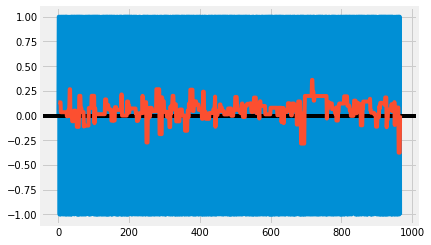

In [ ]:
#Plot graph of area under curve
plt.plot(merged_data['binary_up_down_1'])
plt.axhline(y=0, color='black', linestyle='-')
plt.plot(merged_data['polarity'])
plt.show()

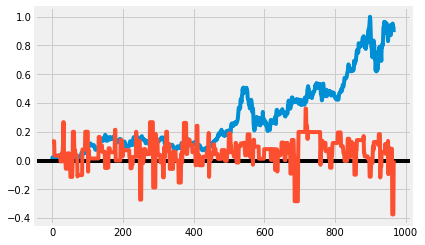

In [ ]:
#Plot graph of area under curve
plt.plot(merged_data['normalized_close'])
plt.axhline(y=0, color='black', linestyle='-')
plt.plot(merged_data['polarity'])
plt.show()

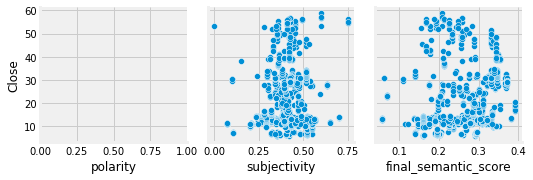

In [ ]:
#Pairplot
sns.pairplot(data=merged_data, y_vars=['Close'], x_vars=['polarity', 'subjectivity', 'final_semantic_score'])

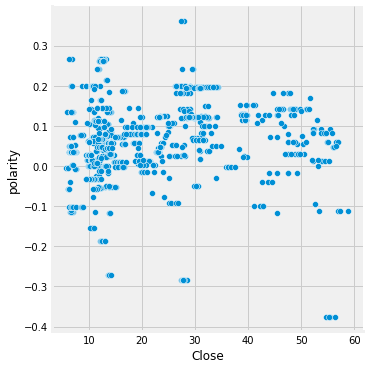

In [ ]:
#Relplot
sns.relplot(x="Close", y="polarity", data=merged_data);

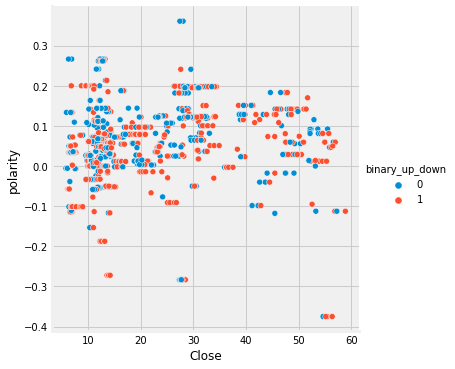

In [ ]:
#Relplot
sns.relplot(x="Close", y="polarity", hue="binary_up_down", data=merged_data)

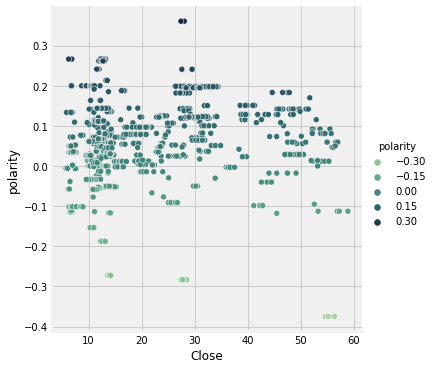

In [ ]:
#Relplot
sns.relplot(x="Close", y="polarity", hue="polarity", palette="ch:r=-.5,l=.75",data=merged_data)

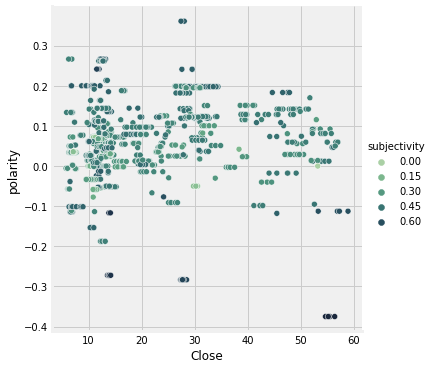

In [ ]:
#Relplot
sns.relplot(x="Close", y="polarity", hue="subjectivity", palette="ch:r=-.5,l=.75",data=merged_data)